In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
work_dir = "./raw_data/"
tile_dir = work_dir + "tiles/"
mask_dir = work_dir + "masks/"

tile_paths = sorted([tile_dir + f for f in os.listdir(tile_dir)])
mask_paths = sorted([mask_dir + f for f in os.listdir(mask_dir)])

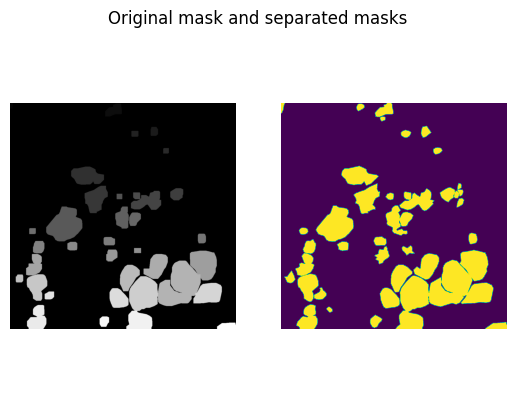

In [22]:
from Segmentation import label_image

def parse_number_str(s):
    return ''.join(filter(str.isdigit, s))

os.makedirs(work_dir + "separated_masks", exist_ok=True)

for mask_path in mask_paths:
    mask = Image.open(mask_path)
    mask = np.array(mask)

    separated_masks = label_image(mask)
    separated_masks = np.stack([separated_masks, separated_masks, separated_masks], axis=-1)
    separated_masks = separated_masks / separated_masks.max() * 255
    separated_masks = separated_masks.astype(np.uint8)
    separated_masks = Image.fromarray(separated_masks)

    separated_masks.save(work_dir + "separated_masks/" + parse_number_str(mask_path) + ".png")

    # demonstration purposes
    clear_output(wait=True)
    plt.title("Original mask and separated masks")
    plt.axis('off')
    plt.subplot(1, 2, 1)
    plt.imshow(separated_masks)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(mask)
    plt.axis('off')
    plt.show()
clear_output(wait=True)